# AirBnB Listings Data Analysis - Seville (Spain)

AirBnB is an online marketplace that connects people who want to rent their properties with those looking for accommodations. The platform allows property owners (known as 'hosts') to list their spaces (which can range from single rooms to entire homes) for short-term rental. Guests can browse these listings, compare prices, read reviews, and book accommodations directly through the website or app.

The website [Inside Airbnb](https://insideairbnb.com/) provides us access to data that can be analyzed and used for many projects and solutions in the most important cities all around the world.

In this notebook, we will be working with a summarized dataset of Seville (Spain) to extract insights. This dataset includes information on hosts, prices, room types, rental periods, reviews, locations, and availability.

To achieve this, we will follow four steps:
1. Loading the data
2. Data Understanding
3. Data Cleaning
4. Data Analysis

By: Andrea López Puertas

## 1. Loading

### 1.1. Loading libraries

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [110]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

### 1.2. Loading data

In [111]:
df_listings = 'https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-06-30/visualisations/listings.csv'

In [112]:
df = pd.read_csv(df_listings)

## 2. Data Undertanding

### 2.1. Dataset Size

First, we examine the number of rows and variables in the dataset to grasp its size. Next, we review each variable to understand their characteristics and data types.

In [113]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7885 non-null   int64  
 1   name                            7885 non-null   object 
 2   host_id                         7885 non-null   int64  
 3   host_name                       7885 non-null   object 
 4   neighbourhood_group             7885 non-null   object 
 5   neighbourhood                   7885 non-null   object 
 6   latitude                        7885 non-null   float64
 7   longitude                       7885 non-null   float64
 8   room_type                       7885 non-null   object 
 9   price                           7359 non-null   float64
 10  minimum_nights                  7885 non-null   int64  
 11  number_of_reviews               7885 non-null   int64  
 12  last_review                     71

The DataFrame consists of:

- 18 variables
- 7885 rows
- 3 types of variables:
    - Numerical:
        - Integer (7)
        - Float (4)
    - Categorical:
        - Object (7)


The dataset contains information and metrics for accommodations. Below, we can find each variable along with their description:
- **'id'**: Airbnb's unique identifier for the listing;
- **'name'**: Name of the listing;
- **'host_id'**: Airbnb's unique identifier for the host/user;
- **'host_name'**: Name of the host. Usually just the first name(s);
- **'neighbourhood_group'**: This column does not contain any valid/reported values;
- **'neighbourhood'**: Name of the neighborhood where the property is located;
- **'latitude'**: Property latitude coordinate using the World Geodetic System (WGS84) projection;
- **'longitude'**: Property longitude coordinate using the World Geodetic System (WGS84) projection;
- **'room_type'**: Informs the type of room/rental type offered by the host;
- **'price'**: Daily price in local currency. NOTE: the $ sign is a technical artifact of the export, please ignore it;
- **'minimum_nights'**: Minimum number of night stay for the listing (calendar rules may be different);
- **'number_of_reviews'**: The number of reviews the listing has;
- **'last_review'**: The date of the last/newest review;
- **'reviews_per_month'**: The average number of reviews per month the listing has over the lifetime of the listing;
- **'calculated_host_listings_count'**: The number of listings the host has in the current scrape, in the city/region geography;
- **'availability_365'**: The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host;
- **'number_of_reviews_ltm'**: The number of reviews the listing has (in the last 12 months);
- **'license'**: The licence/permit/registration number.

There are 18 variables that provide enough amount of information for data exploration. We see three variables that need to be converted to object and datetime, as well as some missing values, which will require cleaning and handling of missing values.

### 2.2. Dataset Visualization

Before performing an analysis, we will start by examining the dataset displaying the first five entries.

In [114]:
df.head().T

,0,1,2,3,4
id,32347,49287,108236,111140,116703
name,SevillaCenter,BEAUTIFUL APARTMENT IN SEVILLE,Sunny apt in heart of seville!!,Quiet&historicenter&local experienc,"Walk to the Cathedral!! ATICO DUPLEX, WIFI."
host_id,139939,224697,560040,560040,589600
host_name,Alejandro,Walter,Pepe,Pepe,Miguel
neighbourhood_group,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo
neighbourhood,San Vicente,San Lorenzo,San Vicente,San Vicente,Arenal
latitude,37.39358,37.39898,37.396858,37.395924,37.38551
longitude,-5.99975,-5.99533,-5.999127,-5.999317,-5.99497
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,99.0,80.0,118.0,83.0,77.0


The values ​​corresponding to the rental/daily price for registered properties must be considered in local currency. For Seville, we will consider the Euro.

### 2.3. Descriptive Statistics

Additionally, we examine the descriptive statistics of the numerical variables to gain an overview of the data, understand its distribution and characteristics, and assess the amount of work required.

In [115]:
df.describe(exclude=np.number).T

,count,unique,top,freq
name,7885,7689,Cruz de San Andres Apartments,8
host_name,7885,1223,Nacho,245
neighbourhood_group,7885,11,Casco Antiguo,5381
neighbourhood,7885,105,Alfalfa,859
room_type,7885,4,Entire home/apt,6622
last_review,7168,705,2024-06-23,494
license,7711,5366,Exempt,482


In [116]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
id,7885.0,4.248452e+17,4.693433e+17,32347.000000,2.997564e+07,5.276972e+07,8.883513e+17,1.189233e+18
host_id,7885.0,1.911694e+08,1.780697e+08,139939.000000,3.142092e+07,1.348641e+08,3.306040e+08,5.863134e+08
latitude,7885.0,3.739023e+01,9.430758e-03,37.318174,3.738609e+01,3.739008e+01,3.739572e+01,3.743320e+01
longitude,7885.0,-5.990763e+00,1.220904e-02,-6.014914,-5.997457e+00,-5.992300e+00,-5.986833e+00,-5.899827e+00
price,7359.0,1.358827e+02,3.852131e+02,10.000000,6.300000e+01,8.600000e+01,1.220000e+02,1.723700e+04
minimum_nights,7885.0,3.136462e+00,1.185516e+01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,3.650000e+02
number_of_reviews,7885.0,7.259062e+01,1.108579e+02,0.000000,5.000000e+00,2.800000e+01,9.200000e+01,1.157000e+03
reviews_per_month,7168.0,1.953860e+00,1.752313e+00,0.010000,5.800000e-01,1.440000e+00,2.892500e+00,1.525000e+01
calculated_host_listings_count,7885.0,1.760089e+01,3.319227e+01,1.000000,1.000000e+00,5.000000e+00,2.000000e+01,1.860000e+02
availability_365,7885.0,1.758893e+02,1.027888e+02,0.000000,9.000000e+01,1.630000e+02,2.640000e+02,3.650000e+02


### 2.4. White spaces

We examine if there are any white spaces in unique categories.

In [117]:
whitespaces = df.map(lambda x: isinstance(x, str) and x.strip() == '')
whitespaces_position = whitespaces.any()
whitespaces_position.sum()

0

### 2.5. Duplicated rows

We examine if there are any duplicated rows.

In [118]:
df.duplicated().sum()

0

### 2.6. Variance

We examine if there are variables with zero variance.

In [119]:
constant_variable = [col for col in df.columns if df[col].nunique(dropna = False) == 1]
constant_variable

[]

### 2.7. Missing Data

We assess the presence of missing values and identify the specific variables affected.

In [120]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                             526
minimum_nights                      0
number_of_reviews                   0
last_review                       717
reviews_per_month                 717
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           174
dtype: int64

## 3. Data Cleaning

Removing the 'host_name' variable since it is not relevant for further data exploration.

In [121]:
df.drop(['host_name'], axis=1, inplace=True)

#### 3.1. Types of Attributes

Converting the unique identifiers ('id' and 'host_id') from integers to objects, and changing 'last_review' variable  from an object to a datetime format.

In [122]:
df[['id', 'host_id']] = df[['id', 'host_id']].astype(str)

In [123]:
df['last_review'] = pd.to_datetime(df['last_review'])

#### 3.2. Missing Values

After examining the head of the dataset, we noticed some missing values. Therefore, we need to investigate the missing values further before continuing with the analysis.

We can use the 'sum' function to display the percentage of missing values in each variable of the dataset.

- The variables 'last_review' and 'reviews_per_month' are missing 9.09% of their values.
- The variable 'price'has 6.67% of missing values.
- The variable 'license' has 2.21% of missing values.

In [124]:
(round(df.isnull().sum() / df.shape[0] *100,2)).sort_values(ascending=False)

last_review                       9.09
reviews_per_month                 9.09
price                             6.67
license                           2.21
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
name                              0.00
minimum_nights                    0.00
number_of_reviews                 0.00
neighbourhood_group               0.00
host_id                           0.00
calculated_host_listings_count    0.00
availability_365                  0.00
number_of_reviews_ltm             0.00
id                                0.00
dtype: float64

In [125]:
def analyze_missing_values(df, column_name):
    """
    Analyzes the missing values in a specified column of the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, name of the column to analyze

    Prints:
    - Data type of the column
    - Number of missing values
    - Percentage of missing values
    - Number of unique values
    - Distribution of unique values
    """
    # Data type of the variable:
    dtype = df[column_name].dtype
    print(f"Data type of '{column_name}': {dtype}")
    
    # Calculating and printing the number of missing values:
    missing_values_count = df[column_name].isnull().sum()
    print(f'There are {missing_values_count} missing values.')

    # Calculating and printing the percentage of missing values:
    missing_values_pct = missing_values_count / df.shape[0] * 100
    print(f'The missing values percentage is {missing_values_pct:.2f}%.')

    # Calculating and printing the number of unique values:
    num_unique_values = df[column_name].nunique()
    print(f'There are {num_unique_values} unique values.')

    # Printing the distribution of unique values:
    unique_values = df[column_name].value_counts(ascending=False)
    pd.set_option('display.max_rows', len(unique_values))


In [126]:
analyze_missing_values(df, 'last_review')

Data type of 'last_review': datetime64[ns]
There are 717 missing values.
The missing values percentage is 9.09%.
There are 705 unique values.


In [127]:
MIN_DATE = df['last_review'].min()
MAX_DATE = df['last_review'].max()

print(f'First date is {MIN_DATE}.\nLast date is {MAX_DATE}.')

First date is 2012-10-29 00:00:00.
Last date is 2024-06-29 00:00:00.


To handle missing values in the 'last_review' variable, we have chosen to impute these missing entries with an extreme future date (specifically January 1, 2025) to clearly identify and manage these entries while minimizing their impact on our overall analysis.

In [128]:
# Defining an extreme future date:
future_date = pd.Timestamp('2025-01-01')

# Imputing missing values with the extreme future date:
df.fillna({'last_review': '2025-01-01'}, inplace=True)

In [129]:
analyze_missing_values(df, 'reviews_per_month')

Data type of 'reviews_per_month': float64
There are 717 missing values.
The missing values percentage is 9.09%.
There are 730 unique values.


If there were no review in 'last_reviews' variable, therefore, we need to reflect it in 'reviews_per_month' too. So, we are replacing missing values with zero in 'reviews_per_month' to ensure consistency with 'last_review' variable.

In [130]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [131]:
analyze_missing_values(df, 'price')

Data type of 'price': float64
There are 526 missing values.
The missing values percentage is 6.67%.
There are 503 unique values.


We will replace the missing values in the 'price' variable by grouping the data based on the 'neighbourhood' and 'room_type' variables to determine the median price values within these groups. If missing values remain after this imputation, we will replace them with the general median.

In [132]:
df2 = df.copy()

In [133]:
df2_ = df2.dropna(subset=['price'])

In [134]:
median_price_df = df2_.groupby(['neighbourhood', 'room_type'])['price'].median().reset_index()
median_price_df.rename(columns={'price': 'median_price'}, inplace=True)

In [135]:
df2 = df2.merge(median_price_df, on=['neighbourhood', 'room_type'], how='left')

In [136]:
df2['price'] = df2['price'].fillna(df2['median_price'])

In [137]:
df2['price'].isnull().sum()

26

In [138]:
df2.drop('median_price', axis=1, inplace=True)

We have missing values after the imputation, so we will replace them with the overall median price.

In [139]:
median_price = df2['price'].median()
df2.fillna({'price': median_price}, inplace=True)

In [140]:
df2['price'].isnull().sum()

0

In [141]:
analyze_missing_values(df2, 'license')

Data type of 'license': object
There are 174 missing values.
The missing values percentage is 2.21%.
There are 5366 unique values.


Replacing all NaN values in the 'license' variable with the value 'unknown,' as the missing values represent a unique category that is currently unidentified.

In [142]:
df2.fillna({'license': 'unknown'}, inplace=True)

In [143]:
# Checking there are no more missing values:
(round(df2.isnull().sum() / df2.shape[0] *100,2)).sort_values(ascending=False)

id                                0.0
minimum_nights                    0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
price                             0.0
name                              0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_id                           0.0
license                           0.0
dtype: float64

In [144]:
# Observing the changes:
df2.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,32347,SevillaCenter,139939,Casco Antiguo,San Vicente,37.393580,-5.999750,Entire home/apt,99.0,2,167,2020-01-08,1.02,1,2,0,CTC-2018150852
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,224697,Casco Antiguo,San Lorenzo,37.398980,-5.995330,Entire home/apt,80.0,3,39,2020-02-17,0.24,1,161,0,VFT/SE/01116
2,108236,Sunny apt in heart of seville!!,560040,Casco Antiguo,San Vicente,37.396858,-5.999127,Entire home/apt,118.0,2,197,2024-06-11,1.23,5,76,18,VFT/SE/05126
3,111140,Quiet&historicenter&local experienc,560040,Casco Antiguo,San Vicente,37.395924,-5.999317,Entire home/apt,83.0,3,51,2024-06-10,0.32,5,32,9,VFT/SE/08197
4,116703,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",589600,Casco Antiguo,Arenal,37.385510,-5.994970,Entire home/apt,77.0,3,271,2024-06-17,1.71,9,321,31,unknown


#### 3.3. Outliers

Histograms are crucial for visualizing the distribution of each variable and identifying outliers.

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'last_review'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

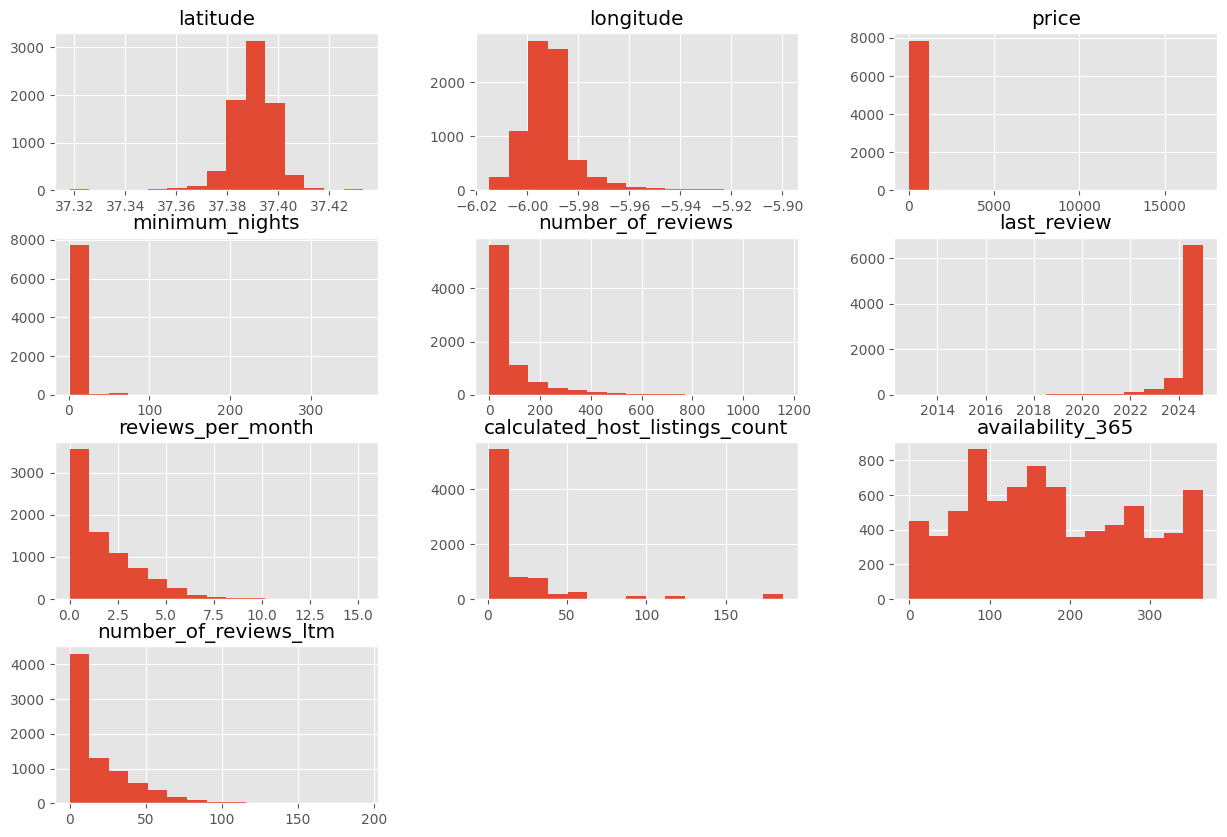

In [145]:
df2.hist(bins=15, figsize=(15,10))

We will use the describe() method in order to show the statistics of the key numerical variables.\
Excluding variables such as 'latitude' and 'longitude' from consideration.

In [146]:
df2[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
price,7885.0,132.08,10.0,63.0,85.0,119.0,17237.0,372.45
minimum_nights,7885.0,3.14,1.0,1.0,2.0,2.0,365.0,11.86
number_of_reviews,7885.0,72.59,0.0,5.0,28.0,92.0,1157.0,110.86
last_review,7885,2024-04-03 06:02:19.708306944,2012-10-29 00:00:00,2024-05-04 00:00:00,2024-06-09 00:00:00,2024-06-23 00:00:00,2025-01-01 00:00:00,NaN
reviews_per_month,7885.0,1.78,0.0,0.37,1.22,2.72,15.25,1.76
calculated_host_listings_count,7885.0,17.6,1.0,1.0,5.0,20.0,186.0,33.19
availability_365,7885.0,175.89,0.0,90.0,163.0,264.0,365.0,102.79
number_of_reviews_ltm,7885.0,18.58,0.0,2.0,10.0,29.0,193.0,21.81


Let's examine the 'price' variable.
- The minimum price is 10.0.
- The average price is 132.08.
- And the maximum is 17237.0.

These statistical results may distort our analysis. Therefore, it is necessary to correct the outliers of this variable.

The same happens in the 'minimum_nights' variable.
- The minimum is 1 night.
- The average is 3.14 nights.
- And the maximum value is 365 nights. One complete year.

The distributions of the remaining variables appear logical, with no anomalous data detected.

To identify outliers we will be using the Interquartile Rule (IQR Score).
A dataset can be summarized by its five-number summary:
- The minimum or lowest value of the dataset.
- The first quartile (Q1), which represents the 25th percentile of the data.
- The median of the dataset, which represents the 50th percentile of the data.
- The third quartile (Q3), which represents the 75th percetile of the data.
- The maximum or highest value of the dataset.

This information is essential for identifying patterns and outliers.

Any data point below the lower bound or above the upper bound is considered an outlier.
So, all we have to do is subtract the Q1 from the Q3:\
IQR = Q3 – Q1

We will generate boxplots to analyze the distribution of numerical variables.

In [147]:
def plot_boxplots(df):
    """
    Creates and displays a boxplot for each numerical variable in the DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Identifying numerical variables:
    excluded_columns = ['latitude', 'longitude']
    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

    # Setting up the plotting environment:
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
    
    if num_plots == 1:
        axes = [axes]

    for ax, col in zip(axes, numerical_columns):
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(f'Boxplot of {col}')
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

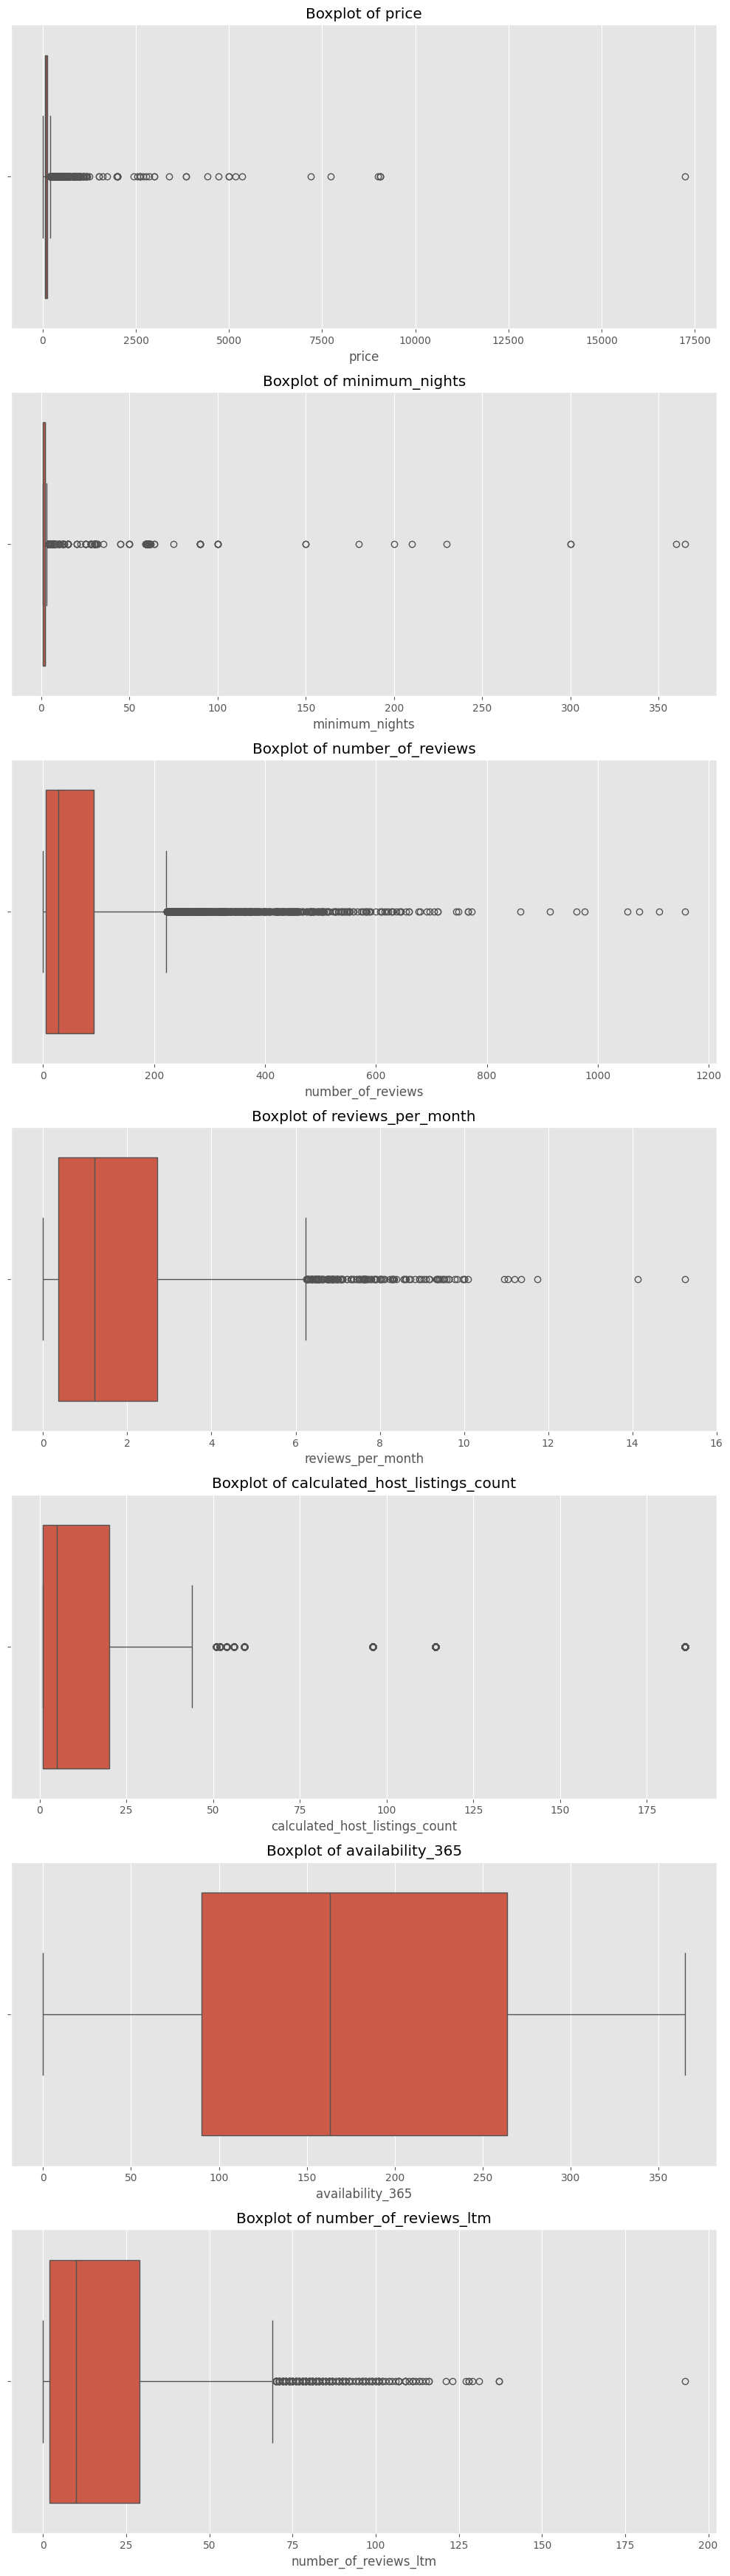

In [148]:
plot_boxplots(df2)

In [149]:
# 'price'

# Calculating Q1 and Q3:
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)

# Computing IQR and determining outlier boundaries:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers:
outliers = df2[(df2['price'] < lower_bound) | (df2['price'] > upper_bound)]

# Printing results:
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'N.º entries above Upper Bound: {(len(df2[df2.price > upper_bound]))}')
print(f'Percentage of dataset: {round((len(df2[df2.price > upper_bound]) / df2.shape[0]) * 100, 2)}%')

Q1: 63.0
Q3: 119.0
IQR: 56.0
Lower Bound: -21.0
Upper Bound: 203.0
N.º entries above Upper Bound: 692
Percentage of dataset: 8.78%


In [150]:
# 'minimum_nights'

# Calculating Q1 and Q3:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)

# Computing IQR and determining outlier boundaries:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers:
outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]

# Printing results:
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'N.º entries above Upper Bound: {(len(df2[df2.minimum_nights > upper_bound]))}')
print(f'Percentage of dataset: {round((len(df2[df2.minimum_nights > upper_bound]) / df2.shape[0]) * 100, 2)}%')

Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
N.º entries above Upper Bound: 448
Percentage of dataset: 5.68%


Given these considerations, we will create a new DataFrame named 'df_clean' to store a cleaned version of the dataset. We will remove all entries where the price is equal to 0.0 and higher than 119.0.

Similarly, we will exclude entries where the 'minimum_nights' value exceeds 3.

In [151]:
df_clean = df2.copy()

In [152]:
# Selecting the entries that meet the specified criteria:
df_clean = df_clean[(df2['price'] <= 119.0) & (df2['minimum_nights'] <= 3)]

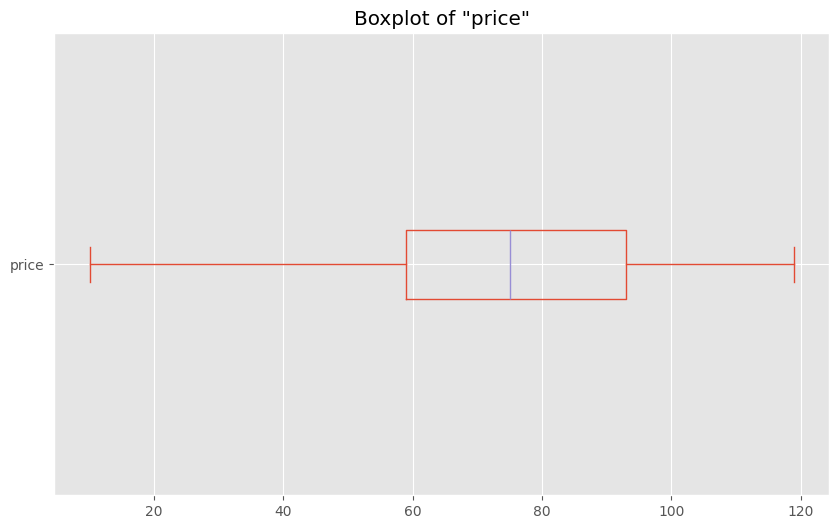

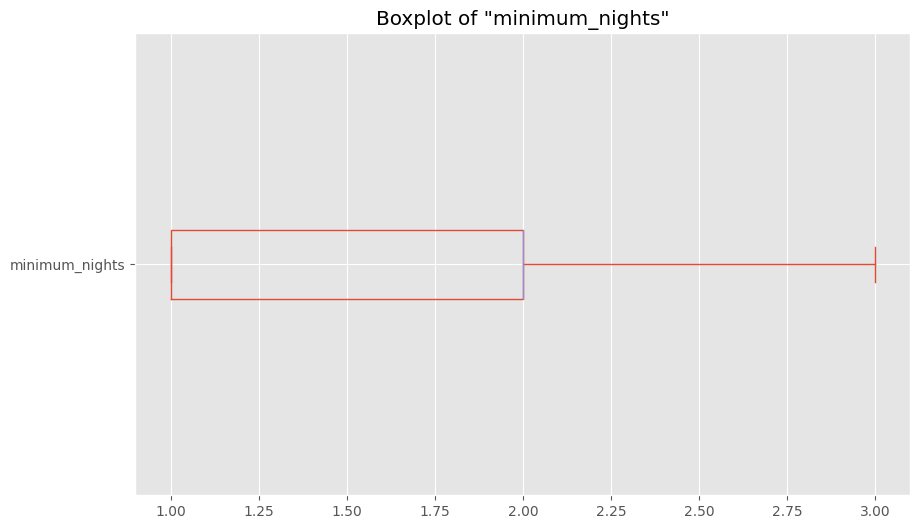

In [153]:
# Plotting the boxplots after removing outliers:
fig, ax = plt.subplots(figsize=(10,6))
df_clean['price'].plot(kind='box', vert=False)
ax.set_title('Boxplot of "price"')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
df_clean['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Boxplot of "minimum_nights"')
plt.show()


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'last_review'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

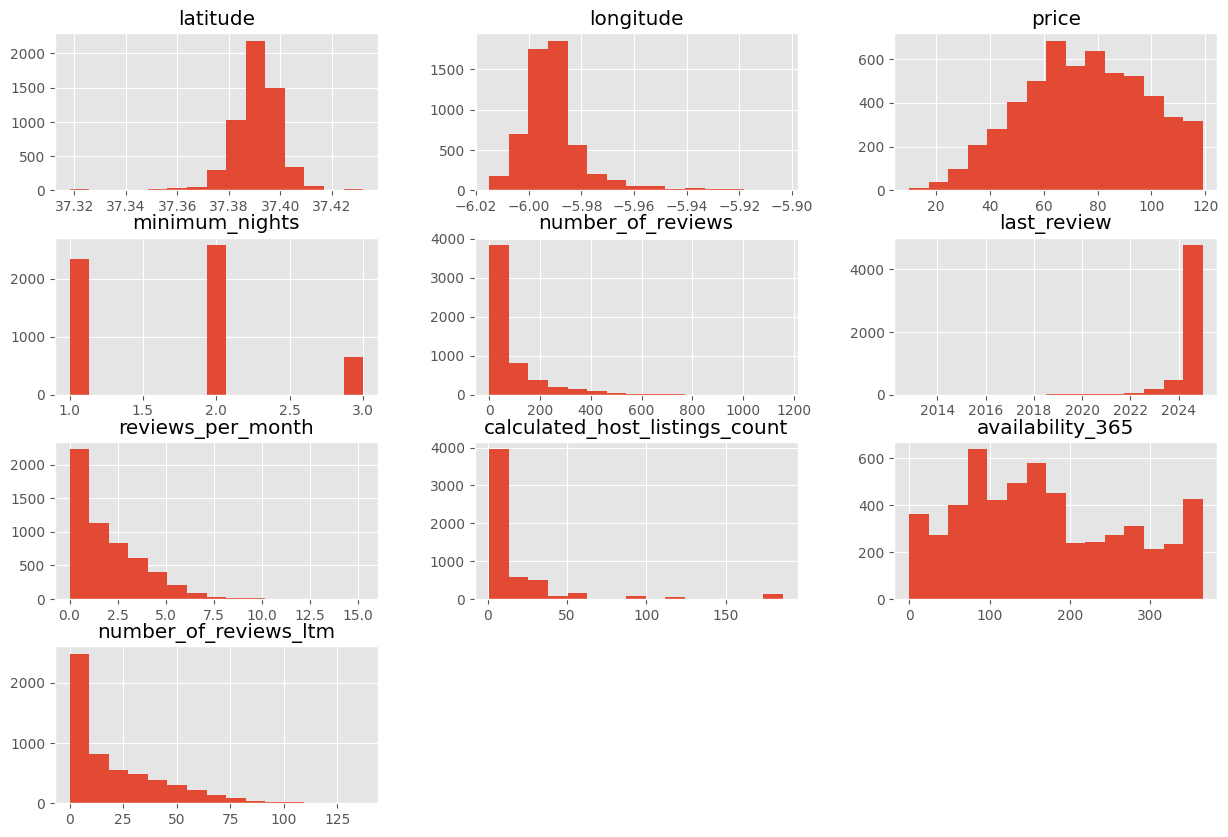

In [154]:
# Plotting cleaned histograms:
df_clean.hist(bins=15, figsize=(15,10))

After cleaning the dataset, the distributions now appear to be satisfactory.

#### 3.4. Correlations

Next, we will investigate potential correlations between the variables in the dataset.

We will start by generating a correlation matrix using the corr() method and then visualize this matrix using the 'heatmap' function from Seaborn.

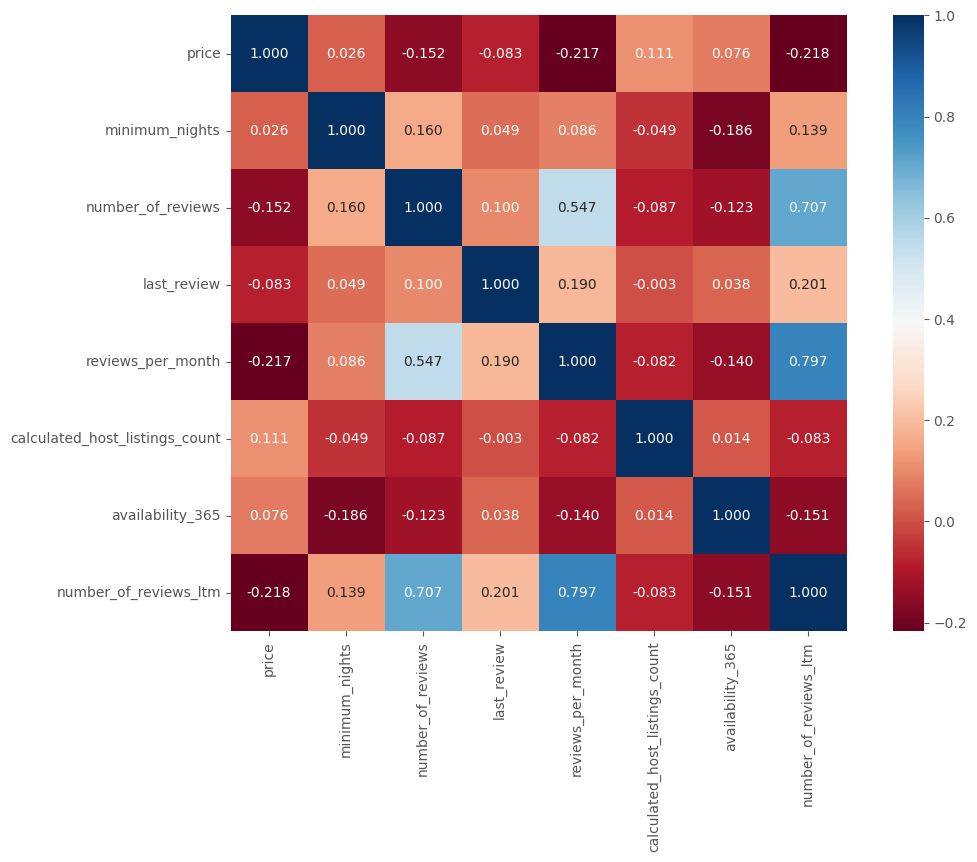

In [155]:
correlation_matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            cmap='RdBu',
            fmt='.3f',
            square=True,
            linecolor='white',
            annot=True)

plt.show()

As observed in the chart, there appear to be no significant correlations.

## 4. Data Analysis

Next, we will analyze three important aspects:
1. Most listed property types
2. Top 10 most expensive neighbourhoods listing prices on average
3. Average listing price by property type

### **4.1. Most listed property types**

In [156]:
df_clean['room_type'].value_counts()

room_type
Entire home/apt    4538
Private room        997
Shared room          20
Hotel room           15
Name: count, dtype: int64

In [157]:
roomtype_pct = round(df_clean['room_type'].value_counts() / df_clean.shape[0] * 100, 2)
roomtype_pct

room_type
Entire home/apt    81.47
Private room       17.90
Shared room         0.36
Hotel room          0.27
Name: count, dtype: float64

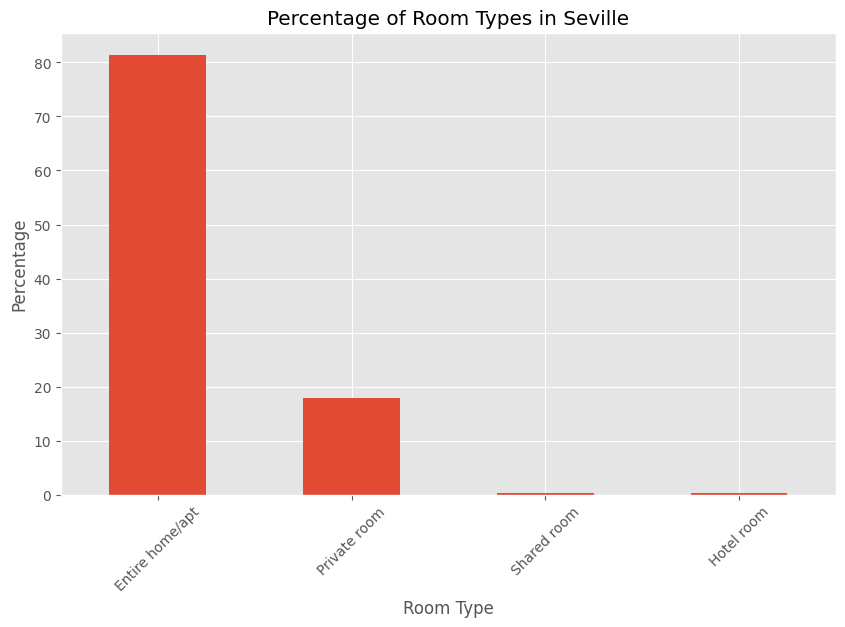

In [158]:
# Plotting the percentage of each property type listing in Seville:
roomtype_pct.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Room Type')
plt.ylabel('Percentage')

plt.title('Percentage of Room Types in Seville')
plt.xticks(rotation=45)

plt.show()

As observed in the graph, entire properties and private rooms constitute the majority of listed accommodations in Seville (81.47% and 17.90% respectively).

### **4.2. Top 10 most expensive neighbourhoods listing prices on average**

In [159]:
mostexpensive_neighbourhood = df_clean.groupby('neighbourhood')['price'].mean().round(3).sort_values(ascending=False)[:10]
mostexpensive_neighbourhood

neighbourhood
Tabladilla, La Estrella    113.000
El Cano, Los Bermejales     87.000
Santa Cruz                  86.857
Zodiaco                     85.000
Pino Flores                 85.000
Arenal                      84.503
San Bernardo                84.305
Alfalfa                     82.337
Museo                       81.369
Retiro Obrero               80.750
Name: price, dtype: float64

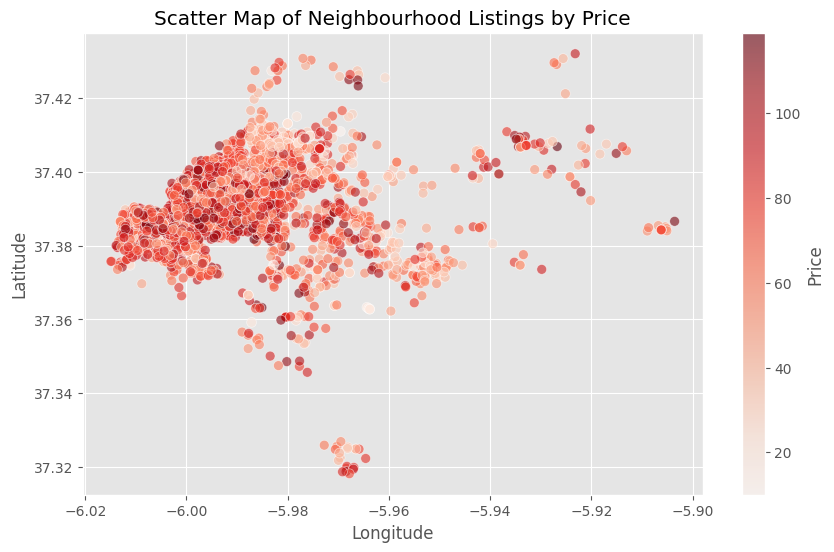

In [160]:
# Plotting the neighbourhood listing price of properties in Seville:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['longitude'],
                      df_clean['latitude'], 
                      c=df_clean['price'], 
                      cmap='Reds', 
                      s=50,             # Sets the size of the points
                      alpha=0.6,
                      edgecolors='w', 
                      linewidth=0.5)

plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Map of Neighbourhood Listings by Price')
plt.grid(True)
plt.show()

The variation in average prices among the ten most expensive neighbourhoods in Seville is minimal, as indicated by the results. This suggests that, despite some differences, the average prices across these neighbourhoods are relatively consistent. Seville, known for its rich cultural heritage and diverse districts, displays subtle price differences in its most affluent areas, reflecting a generally uniform high-value market segment.

### **4.3. Average listing price by property type**

In [161]:
# Calculating the average price by 'room_type':
avgprice_roomtype = df_clean.groupby('room_type')['price'].mean().round(2).sort_values(ascending=False)
avgprice_roomtype

room_type
Hotel room         99.07
Entire home/apt    79.97
Private room       52.73
Shared room        45.25
Name: price, dtype: float64

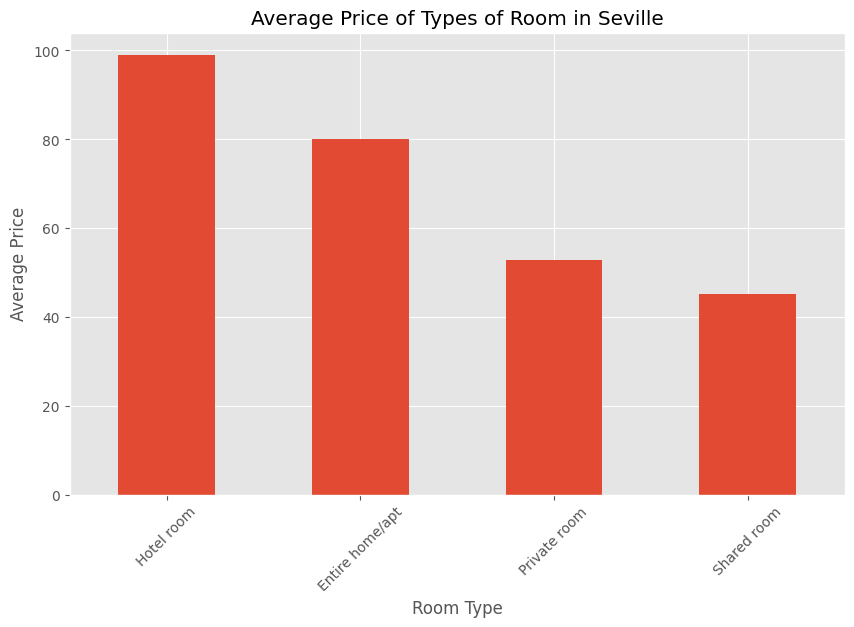

In [162]:
# Plotting the average price of each type of room in Seville:
avgprice_roomtype.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Room Type')
plt.ylabel('Average Price')

plt.title('Average Price of Types of Room in Seville')
plt.xticks(rotation=45)

plt.show()

As observed in the graph, hotel rooms and entire properties have the highest prices in Seville.

## Conclusion

The Exploratory Data Analysis (EDA) conducted on AirBnB listings in Seville (Spain), using a summarized dataset published in June 2024, provides valuable insights into the rental market.
This analysis, focused on properties with more affordable rent for tourists, reveals notable trends and patterns. The following conclusions were drawn from the examination of the data:

- The average prices among the 10 most expensive neighbourhoods in Seville exhibit minimal variation. Notably, the 10 priciest properties listed are not necessarily influenced by proximity to the river or the historic city centre. This suggests that other factors, such as the availability of rental properties in those neighborhoods and the range of services offered, may contribute to the pricing in these areas.
- In Seville, the preferred rental option is entire properties, comprising approximately 81% of listings, followed by private rooms at approximately 17%. The average daily price for entire apartments is 79.97 €, while private rooms average 52.73 €.
- In contrast, the least favourable option for tourists seems to be hotel rooms, which have the highest average daily price at 99.07 €.

For a more comprehensive analysis of the AirBnB service in Seville, it is advisable to use a more detailed and extensive database. Incorporating features we could perform a deeper examination and provide better insights into the factors influencing accommodation options.